In [0]:
# LSTM -> Long Short Term Memory
# Pre-requisite: Upload the Sentiment.csv file here to run this 





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [0]:
df = pd.read_csv("Sentiment.csv")

In [0]:
df.head()

In [5]:
df.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

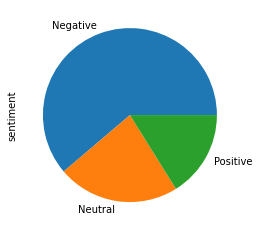

In [6]:
df.sentiment.value_counts().plot.pie()

In [7]:
df.candidate.value_counts()

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64

In [0]:
# Group by
df.groupby(["candidate","sentiment"]).size()

In [0]:
df2 = df[["candidate","sentiment","text"]]

In [13]:
df2.head()
#df2.dtypes

candidate    object
sentiment    object
text         object
dtype: object

In [0]:
# Preprocessing on this data now
def tweet_process(tweet):
  tweet = str(tweet)
  if tweet.startswith("RT @"):
    tweet = tweet.replace("RT @","")

  return tweet

In [17]:
df2.text = df2.text.apply(lambda x:tweet_process(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
# After processing lets see
df2.head()

,candidate,sentiment,text
0,No candidate mentioned,Neutral,NancyLeeGrahn: How did everyone feel about the...
1,Scott Walker,Positive,ScottWalker: Didn't catch the full #GOPdebate ...
2,No candidate mentioned,Neutral,TJMShow: No mention of Tamir Rice and the #GOP...
3,No candidate mentioned,Positive,RobGeorge: That Carly Fiorina is trending -- h...
4,Donald Trump,Positive,DanScavino: #GOPDebate w/ @realDonaldTrump del...


In [0]:
# TODO: Define stopWords removal function

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
max_features = 2000
smallTokenizer = Tokenizer(num_words=max_features)

In [0]:
smallTokenizer.fit_on_texts(df2.text)

In [31]:
smallTokenizer.word_counts

OrderedDict([('nancyleegrahn', 6),
             ('how', 625),
             ('did', 435),
             ('everyone', 92),
             ('feel', 64),
             ('about', 1143),
             ('the', 8907),
             ('climate', 72),
             ('change', 82),
             ('question', 348),
             ('last', 891),
             ('night', 647),
             ('exactly', 22),
             ('gopdebate', 8939),
             ('scottwalker', 89),
             ("didn't", 256),
             ('catch', 9),
             ('full', 45),
             ('here', 139),
             ('are', 812),
             ('some', 167),
             ('of', 3379),
             ("scott's", 2),
             ('best', 185),
             ('lines', 14),
             ('in', 1988),
             ('90', 12),
             ('seconds', 16),
             ('walker16', 28),
             ('http', 2992),
             ('t', 3723),
             ('co', 3608),
             ('zsff…', 1),
             ('tjmshow', 1),
             ('no',

In [0]:
X = smallTokenizer.texts_to_sequences(df2.text)

In [28]:
X[0]

[57, 85, 343, 462, 26, 2, 421, 377, 102, 34, 56, 1045, 1]

In [29]:
df2.text[0]

'NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [33]:
len(X),df2.shape

(13871, (13871, 3))

In [0]:
#Padding
padded_X = pad_sequences(X,maxlen=31)


In [41]:
padded_X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   57,   85,  343,  462,
         26,    2,  421,  377,  102,   34,   56, 1045,    1], dtype=int32)

In [42]:
padded_X.shape

(13871, 31)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.utils import to_categorical


In [0]:
model = Sequential()
model.add(Embedding(max_features,128, input_length=31))
model.add(LSTM(196,dropout=.2))
model.add(Dense(3,activation=softmax))


In [0]:
Y = pd.get_dummies(df2.sentiment)

In [0]:
Y

In [0]:
model.compile(optimizer="rmsprop", loss=categorical_crossentropy, metrics= ["acc"])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 31, 128)           256000    
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(padded_X, Y, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
174/174 [==============================] - 23s 133ms/step - loss: 0.6328 - acc: 0.7340 - val_loss: 0.6163 - val_acc: 0.7373
Epoch 2/10
174/174 [==============================] - 23s 133ms/step - loss: 0.6098 - acc: 0.7468 - val_loss: 0.6145 - val_acc: 0.7384
Epoch 3/10
174/174 [==============================] - 23s 133ms/step - loss: 0.5872 - acc: 0.7570 - val_loss: 0.6344 - val_acc: 0.7283
Epoch 4/10
174/174 [==============================] - 23s 131ms/step - loss: 0.5689 - acc: 0.7636 - val_loss: 0.6522 - val_acc: 0.7268
Epoch 5/10
174/174 [==============================] - 23s 133ms/step - loss: 0.5558 - acc: 0.7744 - val_loss: 0.6603 - val_acc: 0.7117
Epoch 6/10
174/174 [==============================] - 23s 133ms/step - loss: 0.5362 - acc: 0.7822 - val_loss: 0.6725 - val_acc: 0.7283
Epoch 7/10
174/174 [==============================] - 23s 134ms/step - loss: 0.5186 - acc: 0.7897 - val_loss: 0.6970 - val_acc: 0.7117
Epoch 8/10
174/174 [==============================] - 2